In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# from tsfresh import extract_features, select_features
# from tsfresh.utilities.dataframe_functions import make_forecasting_frame, roll_time_series, impute
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)

In [7]:
path="/kaggle/input/detect-fraud/bank_fraud_detection.csv"
data=pd.read_csv(path,sep=',')
data

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0
...,...,...,...,...,...,...,...,...,...,...
594638,179,'C1753498738','3','F','28007','M1823072687','28007','es_transportation',20.53,0
594639,179,'C650108285','4','F','28007','M1823072687','28007','es_transportation',50.73,0
594640,179,'C123623130','2','F','28007','M349281107','28007','es_fashion',22.44,0
594641,179,'C1499363341','5','M','28007','M1823072687','28007','es_transportation',14.46,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


Total fraud transactions count : 7200
Total legitimate transactions count : 587443


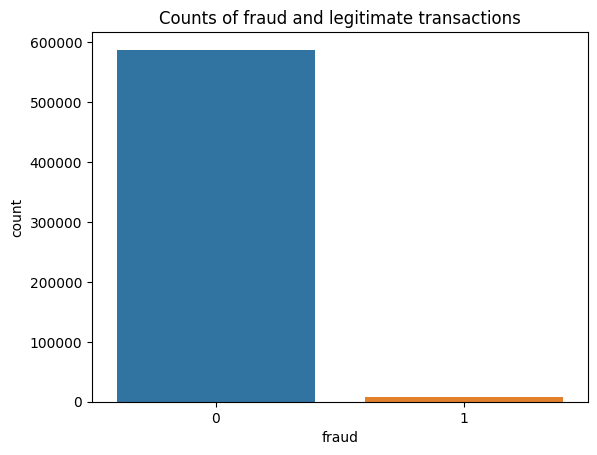

In [9]:
fraud_count=data[data['fraud']==1].shape[0]
notfraud_count=data['fraud'].shape[0]-fraud_count
print('Total fraud transactions count : {}'.format(fraud_count))
print('Total legitimate transactions count : {}'.format(notfraud_count))
sns.countplot(x='fraud',data=data)
plt.title('Counts of fraud and legitimate transactions')
plt.show()

In [10]:
print(data.loc[data['fraud'] == 1,'age'].value_counts())
print(data.loc[data['fraud'] == 1,'category'].value_counts())
print(data.loc[data['fraud'] == 1,'gender'].value_counts())

age
'2'    2344
'3'    1755
'4'    1410
'1'     689
'5'     686
'6'     261
'0'      48
'U'       7
Name: count, dtype: int64
category
'es_sportsandtoys'         1982
'es_health'                1696
'es_wellnessandbeauty'      718
'es_travel'                 578
'es_hotelservices'          548
'es_leisure'                474
'es_home'                   302
'es_hyper'                  280
'es_otherservices'          228
'es_tech'                   158
'es_barsandrestaurants'     120
'es_fashion'                116
Name: count, dtype: int64
gender
'F'    4758
'M'    2435
'E'       7
Name: count, dtype: int64


In [11]:
data[data['fraud']==1]['amount'].mean()

530.9265513888889

Text(0.5, 1.0, 'Mean Transaction Amount by Step')

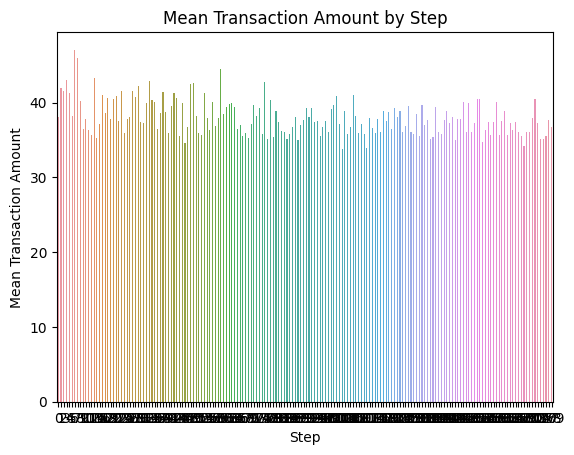

In [12]:
hist=[data[data['step']==i]['amount'].mean().round(2)for i in range(180)]
hist_df = pd.DataFrame({'step': range(180), 'mean_amount': hist})
sns.barplot(x='step', y='mean_amount', data=hist_df,width=0.4)
plt.xlabel('Step')
plt.ylabel('Mean Transaction Amount')
plt.title('Mean Transaction Amount by Step')

No proper linear corealtion between step and fraud

In [13]:
print("Mean values of amount and fraud with respective category",data.groupby('category')[['amount'\
    ,'fraud']].mean())

Mean values of amount and fraud with respective category                               amount     fraud
category                                      
'es_barsandrestaurants'    43.461014  0.018829
'es_contents'              44.547571  0.000000
'es_fashion'               65.666642  0.017973
'es_food'                  37.070405  0.000000
'es_health'               135.621367  0.105126
'es_home'                 165.670846  0.152064
'es_hotelservices'        205.614249  0.314220
'es_hyper'                 45.970421  0.045917
'es_leisure'              288.911303  0.949900
'es_otherservices'        135.881524  0.250000
'es_sportsandtoys'        215.715280  0.495252
'es_tech'                 120.947937  0.066667
'es_transportation'        26.958187  0.000000
'es_travel'              2250.409190  0.793956
'es_wellnessandbeauty'     65.511221  0.047594


In [14]:
df=data.drop(axis=1,columns=['step','customer','zipcodeOri','zipMerchant'])
df

,age,gender,merchant,category,amount,fraud
0,'4','M','M348934600','es_transportation',4.55,0
1,'2','M','M348934600','es_transportation',39.68,0
2,'4','F','M1823072687','es_transportation',26.89,0
3,'3','M','M348934600','es_transportation',17.25,0
4,'5','M','M348934600','es_transportation',35.72,0
...,...,...,...,...,...,...
594638,'3','F','M1823072687','es_transportation',20.53,0
594639,'4','F','M1823072687','es_transportation',50.73,0
594640,'2','F','M349281107','es_fashion',22.44,0
594641,'5','M','M1823072687','es_transportation',14.46,0


In [15]:
df.dtypes

age          object
gender       object
merchant     object
category     object
amount      float64
fraud         int64
dtype: object

In [16]:
col_cat = df.select_dtypes(include= ['object']).columns
# Convert to categorical and then to numeric codes
df[col_cat] = df[col_cat].apply(lambda x: x.astype('category').cat.codes)

# Display the first 5 rows to confirm changes
df.head()

,age,gender,merchant,category,amount,fraud
0,4,2,30,12,4.55,0
1,2,2,30,12,39.68,0
2,4,1,18,12,26.89,0
3,3,2,30,12,17.25,0
4,5,2,30,12,35.72,0


In [17]:
x=df.drop(axis=1,columns=['fraud'])
y=df['fraud']
x.head()

,age,gender,merchant,category,amount
0,4,2,30,12,4.55
1,2,2,30,12,39.68
2,4,1,18,12,26.89
3,3,2,30,12,17.25
4,5,2,30,12,35.72


In [18]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

y_resampled = pd.DataFrame(y_resampled)

In [19]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_resampled, y_resampled, test_size=0.25, stratify=y_resampled, random_state=42,shuffle=True)

In [21]:
from sklearn.metrics import roc_curve, auc
def plot_roc_auc(y_test, preds):
    '''
    Takes actual and predicted(probabilities) as input and plots the Receiver
    Operating Characteristic (ROC) curve
    '''
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [22]:
# %% K-ello Neigbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
knn = KNeighborsClassifier(n_neighbors=5,p=1)

knn.fit(x_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(p=1)

Classification Report for K-Nearest Neighbours: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    146861
           1       0.98      1.00      0.99    146861

    accuracy                           0.99    293722
   macro avg       0.99      0.99      0.99    293722
weighted avg       0.99      0.99      0.99    293722

Confusion Matrix of K-Nearest Neigbours: 
 [[144424   2437]
 [   372 146489]]
F1 Score: 0.99050


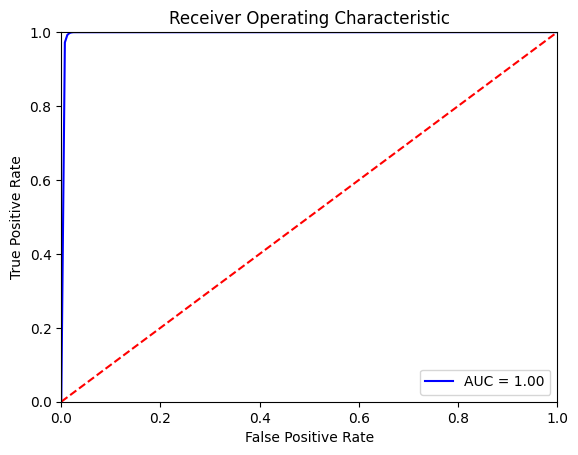

In [43]:
y_pred = knn.predict(x_test)

print("Classification Report for K-Nearest Neighbours: \n", classification_report(y_test, y_pred))
print("Confusion Matrix of K-Nearest Neigbours: \n", confusion_matrix(y_test,y_pred))
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.5f}")
plot_roc_auc(y_test, knn.predict_proba(x_test)[:,1])

In [24]:

from sklearn.metrics import average_precision_score
print('AUPRC = {}'.format(average_precision_score(y_test, knn.predict_proba(x_test)[:,1])))

AUPRC = 0.9923175106222026


In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

2024-06-23 06:52:53.425711: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-23 06:52:53.425849: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-23 06:52:53.614608: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
13769/13769 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 0.9497 - loss: 0.1362 - val_accuracy: 0.9710 - val_loss: 0.0824
Epoch 2/10
13769/13769 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 0.9722 - loss: 0.0765 - val_accuracy: 0.9744 - val_loss: 0.0700
Epoch 3/10
13769/13769 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accuracy: 0.9754 - loss: 0.0667 - val_accuracy: 0.9753 - val_loss: 0.0659
Epoch 4/10
13769/13769 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accuracy: 0.9760 - loss: 0.0641 - val_accuracy: 0.9769 - val_loss: 0.0625
Epoch 5/10
13769/13769 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accuracy: 0.9774 - loss: 0.0606 - val_accuracy: 0.9787 - val_loss: 0.0572
Epoch 6/10
13769/13769 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accuracy: 0.9790 - loss: 0.0567 - val_accuracy: 0.9768 - val_loss: 0.0672
Epoch 7/10
13769/13769 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - accuracy: 0.9792 - loss: 0.0558 - val_accuracy: 0.9791 - val_loss: 0.0537
Epoch 8/10
13769/13769 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accuracy: 

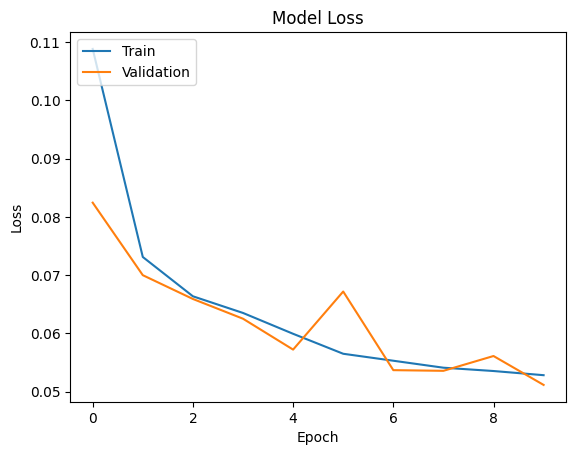

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [33]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score,f1_score
from sklearn.preprocessing import StandardScaler

# feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initializing the models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Training the Random Forest model
rf_model.fit(x_train, y_train)
# Training the Gradient Boosting model
gb_model.fit(x_train_scaled, y_train)

rf_predictions = rf_model.predict(x_test)
gb_predictions = gb_model.predict(x_test_scaled)
final_predictions = (rf_predictions + gb_predictions) / 2
final_predictions = np.round(final_predictions)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, gb_predictions))

# Evaluating the combined predictions
print("Combined Model Classification Report:")
print(classification_report(y_test, final_predictions))

rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(x_test)[:, 1])
gb_roc_auc = roc_auc_score(y_test, gb_model.predict_proba(x_test_scaled)[:, 1])
combined_roc_auc = roc_auc_score(y_test, (rf_model.predict_proba(x_test)[:, 1] + gb_model.predict_proba(x_test_scaled)[:, 1]) / 2)

print(f"Random Forest ROC AUC Score: {rf_roc_auc:.4f}")
print(f"Gradient Boosting ROC AUC Score: {gb_roc_auc:.4f}")
print(f"Combined Model ROC AUC Score: {combined_roc_auc:.4f}")

print("Confusion Matrix of Combined Model: \n", confusion_matrix(y_test,final_predictions))
f1 = f1_score(y_test, final_predictions)
print(f"F1 Score: {f1:.2f}")

/tmp/ipykernel_33/2781898455.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train, y_train)
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    146861
           1       0.99      0.99      0.99    146861

    accuracy                           0.99    293722
   macro avg       0.99      0.99      0.99    293722
weighted avg       0.99      0.99      0.99    293722

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98    146861
           1       0.97      0.99      0.98    146861

    accuracy                           0.98    293722
   macro avg       0.98      0.98      0.98    293722
weighted avg       0.98      0.98      0.98    293722

Combined Model Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99    146861
           1       0.99      0.98      0.99    146861

    accuracy                           0.99    293722
   macro avg

In [42]:
f1 = f1_score(y_test, final_predictions)
print(f"F1 Score: {f1:.5f}")

F1 Score: 0.98685


In [35]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gb_model.fit(x_train, y_train)

# Make predictions
y_pred = gb_model.predict(x_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Gradient Boosting Accuracy: {accuracy:.2f}")

print("Confusion Matrix of Gradient Boosting: \n", confusion_matrix(y_test,y_pred))
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting Accuracy: 0.98
Confusion Matrix of Gradient Boosting: 
 [[142238   4623]
 [  1773 145088]]
F1 Score: 0.98


In [39]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

base_model = DecisionTreeClassifier()

# Create the Bagging Classifier
bagging_model = BaggingClassifier(base_estimator=base_model, n_estimators=50, random_state=42)

# Train the model
bagging_model.fit(x_train, y_train)

# Make predictions
y_pred = bagging_model.predict(x_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Bagging Accuracy: {accuracy:.5f}")

print("Confusion Matrix of Bagging Classifier: \n", confusion_matrix(y_test,y_pred))
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.5f}")

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Accuracy: 0.99097
Confusion Matrix of Bagging Classifier: 
 [[145259   1602]
 [  1050 145811]]
F1 Score: 0.99099


In [41]:
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
base_estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42))
]

# Define the meta-model
meta_model = LogisticRegression()

# Create the Stacking Classifier
stacking_model = StackingClassifier(estimators=base_estimators, final_estimator=meta_model)

# Train the stacking model
stacking_model.fit(x_train, y_train)

# Make predictions
y_pred = stacking_model.predict(x_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Classifier Accuracy: {accuracy:.5f}")

print("Confusion Matrix of Stacking Classifier: \n", confusion_matrix(y_test,y_pred))
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.5f}")

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Stacking Classifier Accuracy: 0.99148
Confusion Matrix of Stacking Classifier: 
 [[145205   1656]
 [   847 146014]]
F1 Score: 0.99150


In [40]:
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier


# Individual ensemble models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Create the Voting Classifier combining the ensemble methods
voting_model = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('adaboost', adaboost_model),
    ('gb', gb_model)
], voting='soft')  # 'soft' voting uses predicted probabilities

# Train the combined model
voting_model.fit(x_train, y_train)

# Make predictions
y_pred = voting_model.predict(x_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Combined Voting Classifier Accuracy: {accuracy:.5f}")


print("Confusion Matrix of Combined model(Random froest, ada classifier, Graident boosting): \n", confusion_matrix(y_test,y_pred))
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.5f}")

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Combined Voting Classifier Accuracy: 0.99077
Confusion Matrix of Combined model(Random froest, ada classifier, Graident boosting): 
 [[144760   2101]
 [   609 146252]]
F1 Score: 0.99082
